# Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import datasets, layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

# Define a dataset

In [14]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Check the shape of all sets

In [15]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Normalize all images

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Visulize the images

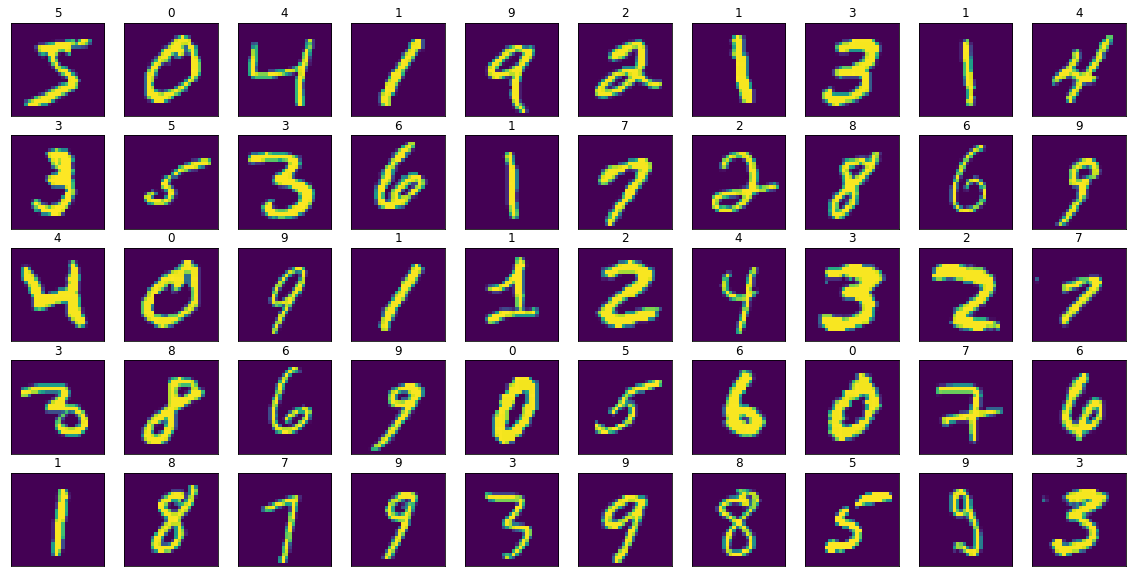

In [18]:
plt.figure(figsize=(20,10))

for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(train_images[i])
  plt.title(train_labels[i])
  plt.xticks([])
  plt.yticks([])

plt.show()

Define a shape before feeding to neural network

In [19]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Define a confusion matrix function

In [34]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model 7

In [ ]:
model7 = tf.keras.Sequential()
model7.add(layers.Conv2D(32, (3,3), activation='relu', strides=(1,1), input_shape=(28,28,1)))
model7.add(layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)))
model7.add(layers.MaxPooling2D((2,2)))
model7.add(layers.Dropout(0.5))
model7.add(layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)))
model7.add(layers.MaxPooling2D((2,2)))
model7.add(layers.Dropout(0.5))

model7.add(layers.Flatten())
model7.add(layers.Dense(128, activation='relu'))
model7.add(layers.Dense(10, activation='softmax'))

model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model7.summary()

c7 = model7.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)       

In [ ]:
model7.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9937


[0.019681420177221298, 0.9937000274658203]

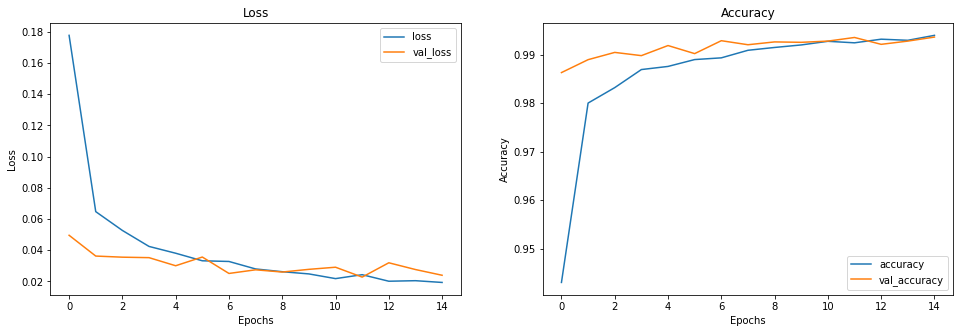

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.plot(c7.history['loss'], label='loss')
plt.plot(c7.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(132)
plt.plot(c7.history['accuracy'], label='accuracy')
plt.plot(c7.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Model 8

In [9]:
model8 = tf.keras.Sequential()
model8.add(layers.Conv2D(64, (3,3), activation='relu', strides=(1,1), input_shape=(28,28,1)))
model8.add(layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)))
model8.add(layers.MaxPooling2D((2,2)))
model8.add(layers.Dropout(0.5))
model8.add(layers.Conv2D(256, (3,3), activation='relu', strides=(1,1)))
model8.add(layers.MaxPooling2D((2,2)))
model8.add(layers.Dropout(0.5))

model8.add(layers.Flatten())
model8.add(layers.Dense(128, activation='relu'))
model8.add(layers.Dense(10, activation='softmax'))

model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model8.summary()

c8 = model8.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 256)         0

In [10]:
model8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9939


[0.028007671236991882, 0.9939000010490417]

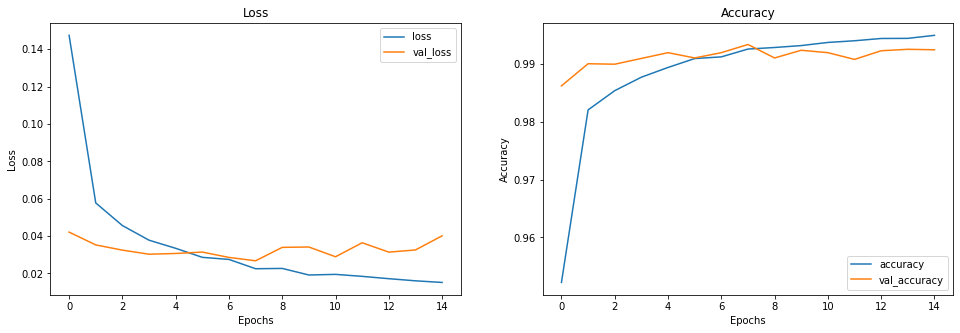

In [12]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.plot(c8.history['loss'], label='loss')
plt.plot(c8.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(132)
plt.plot(c8.history['accuracy'], label='accuracy')
plt.plot(c8.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Model 9

In [26]:
model9 = tf.keras.Sequential()
model9.add(layers.Conv2D(64, (3,3), activation='relu', strides=(1,1), input_shape=(28,28,1)))
model9.add(layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)))
model9.add(layers.MaxPooling2D((2,2)))
model9.add(layers.Dropout(0.5))
model9.add(layers.Conv2D(256, (3,3), activation='relu', strides=(1,1)))
model9.add(layers.MaxPooling2D((2,2)))

model9.add(layers.Flatten())
model9.add(layers.Dense(128, activation='relu'))
model9.add(layers.Dense(10, activation='softmax'))

model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model9.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)             

In [27]:
c9 = model9.fit(train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2942 - accuracy: 0.9014 - val_loss: 0.0494 - val_accuracy: 0.9859
Epoch 2/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0463 - accuracy: 0.9850 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoch 3/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0401 - val_accuracy: 0.9879
Epoch 4/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0352 - val_accuracy: 0.9901
Epoch 5/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0371 - val_accuracy: 0.9909
Epoch 6/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0345 - val_accuracy: 0.9917
Epoch 7/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0280 - val_ac

In [ ]:
model9.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9939


[0.028007671236991882, 0.9939000010490417]

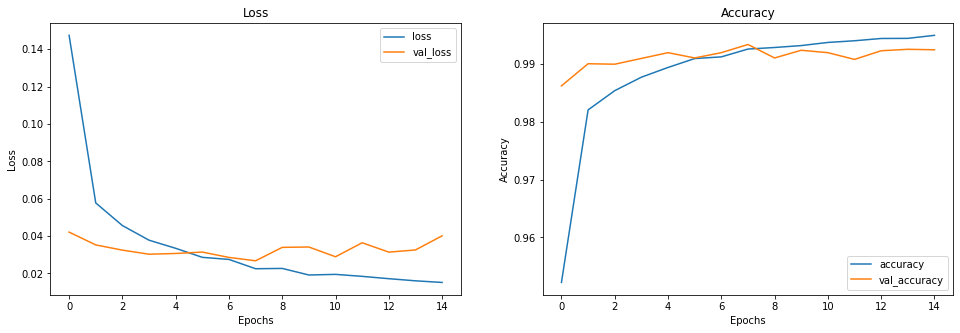

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.plot(c9.history['loss'], label='loss')
plt.plot(c9.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(132)
plt.plot(c9.history['accuracy'], label='accuracy')
plt.plot(c9.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Confusion matrix, without normalization


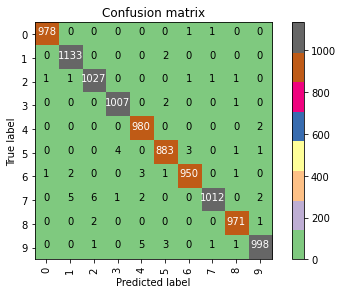

In [43]:
predictions = model8.predict(test_images)

p8 = []
for prediction in predictions:
  prediction = np.argmax(prediction)
  p8.append(prediction)

cm8 = confusion_matrix(test_labels, p8)
plot_confusion_matrix(cm8, classes=[0,1,2,3,4,5,6,7,8,9], cmap='Accent')